In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
rain=pd.read_csv('weatherAUS.csv')

In [3]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
rain['Date']= pd.to_datetime(rain['Date'])

rain['Year']=rain['Date'].dt.year
rain['Month']=rain['Date'].dt.month
rain['Day']=rain['Date'].dt.day
rain['Day of the week']=rain['Date'].dt.dayofweek

rain.drop('Date',axis=1,inplace=True)

In [5]:
rain.dropna(inplace=True, subset=['MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'])


In [6]:
#For the null values in  WindGustDir & WindDir9am, fill with value in WindDir3pm
rain['WindGustDir'].fillna(value=rain['WindDir3pm'],inplace=True)
rain['WindDir9am'].fillna(value=rain['WindDir3pm'],inplace=True)

<AxesSubplot:>

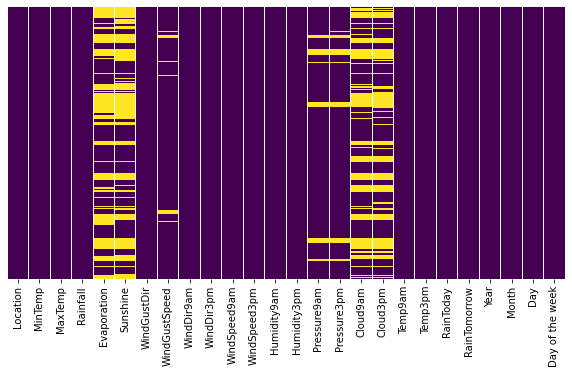

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(data=rain.isnull(),cbar=False,yticklabels=False, cmap='viridis')

In [8]:
dir= {"N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5, "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5, "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5, "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5}
# create columns for directions in degrees-
def rep(val):
    return dir[val]

rain['WindDir3pm']=rain['WindDir3pm'].apply(rep)
rain['WindDir9am']=rain['WindDir9am'].apply(rep)
rain['WindGustDir']=rain['WindGustDir'].apply(rep)

In [9]:
rain['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [10]:
bin_loc={}
for i in rain['Location'].unique():
    bin_loc[i]=rain['Rainfall'][rain['Location']==i].mean()

In [11]:
bin_loc

{'Albury': 1.9019034670292252,
 'BadgerysCreek': 2.202212705210555,
 'Cobar': 1.1397337070777842,
 'CoffsHarbour': 5.175432006010533,
 'Moree': 1.6041040674239624,
 'Newcastle': 2.7788250484183323,
 'NorahHead': 3.4124036440084113,
 'NorfolkIsland': 3.1404298874104346,
 'Penrith': 2.1142959256611733,
 'Richmond': 2.1207764198418295,
 'Sydney': 3.35263480392156,
 'SydneyAirport': 3.004413239719161,
 'WaggaWagga': 1.7161904761904716,
 'Williamtown': 3.504946695095939,
 'Wollongong': 3.6165521978022013,
 'Canberra': 1.7458118556700954,
 'Tuggeranong': 2.143328748280602,
 'MountGinini': 2.8171861836562657,
 'Ballarat': 1.6686827956989132,
 'Bendigo': 1.6174555219872342,
 'Sale': 1.5017621145374371,
 'MelbourneAirport': 1.453936348408707,
 'Melbourne': 1.8422114962702922,
 'Mildura': 0.9492811768639254,
 'Nhil': 0.9329073482428145,
 'Portland': 2.4992795883361816,
 'Watsonia': 1.8136827773995854,
 'Dartmoor': 2.157330415754911,
 'Brisbane': 3.113990306946688,
 'Cairns': 5.7739776951673,
 'G

In [12]:
def rep_loc(loc):
    if bin_loc[loc]>=rain['Rainfall'].mean():
        return 1
    else:
        return 0
    
rain['bin_location']=rain['Location'].apply(rep_loc)

In [13]:
rain.drop('Location',axis=1,inplace=True)

In [14]:
#Obtain a relation between the wind speeds at 9am and 3pm, and the wind gust speed-
speed=rain[['WindGustSpeed','WindSpeed9am', 'WindSpeed3pm']].dropna()
X=speed.drop('WindGustSpeed',axis=1)
y=speed['WindGustSpeed']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm=LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
preds=lm.predict(rain[['WindSpeed9am','WindSpeed3pm']])

In [19]:
rain['WindGustSpeed'].fillna(value=pd.Series(preds),inplace=True)
rain['WindGustSpeed']

0         44.0
1         44.0
2         46.0
3         24.0
4         41.0
          ... 
145454    31.0
145455    31.0
145456    22.0
145457    37.0
145458    28.0
Name: WindGustSpeed, Length: 134590, dtype: float64

<AxesSubplot:>

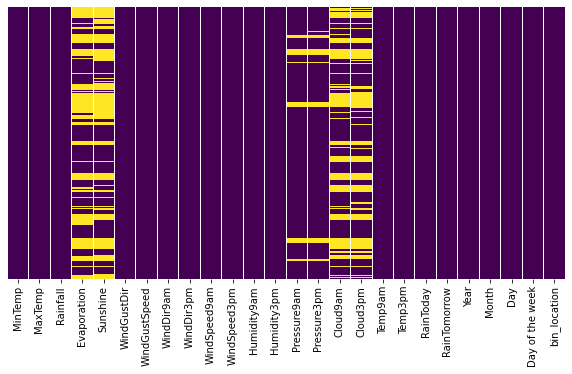

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(data=rain.isnull(),cbar=False,yticklabels=False, cmap='viridis')

In [21]:
def bin_val(val):
    if val=='Yes':
        return 1
    else:
        return 0
rain['RainToday']=rain['RainToday'].apply(bin_val)
rain['RainTomorrow']=rain['RainTomorrow'].apply(bin_val)

In [22]:
rain['Pressure9am'].fillna(value=rain['Pressure9am'].mean(),inplace=True)
rain['Pressure3pm'].fillna(value=rain['Pressure3pm'].mean(),inplace=True)

In [23]:
rain['Evaporation'].fillna(value=rain['Evaporation'].mean(),inplace=True)
rain['Sunshine'].fillna(value=rain['Sunshine'].mean(),inplace=True)
rain['Cloud9am'].fillna(value=rain['Cloud9am'].mean(),inplace=True)
rain['Cloud3pm'].fillna(value=rain['Cloud3pm'].mean(),inplace=True)

<AxesSubplot:>

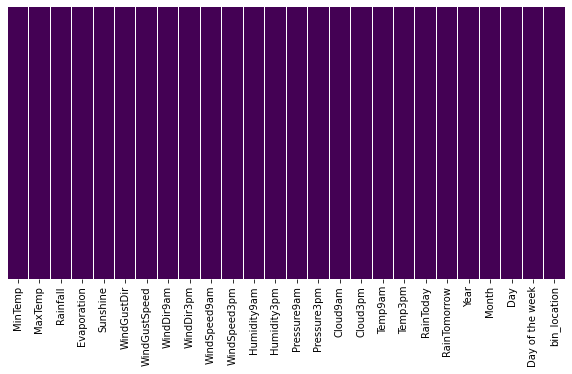

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(data=rain.isnull(),cbar=False,yticklabels=False, cmap='viridis')

In [25]:
rain.dropna(inplace=True)

# Standardizing the data to the same scale

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
scaler.fit(rain.drop('RainTomorrow', axis=1))

StandardScaler()

In [29]:
scaled_features=scaler.transform(rain.drop('RainTomorrow',axis=1))

In [30]:
rain_feat=pd.DataFrame(data=scaled_features,columns=rain.columns[:-1])

In [31]:
rain_feat.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Day of the week
0,0.190588,-0.050450,-0.204660,0.000412,0.000035,0.993564,0.283673,1.013181,1.192551,0.665749,...,1.561893,0.000037,-0.011458,0.007973,-0.534057,-1.867019,1.629076,-1.673419,-1.489698,-0.744311
1,-0.751124,0.261141,-0.276298,0.000412,0.000035,1.217567,0.283673,1.655955,0.747096,-1.145683,...,-0.000069,0.000037,0.034929,0.369187,-0.534057,-1.867019,1.629076,-1.559746,-0.989893,-0.744311
2,0.112112,0.346121,-0.276298,0.000412,0.000035,0.769561,0.432633,1.013181,0.747096,0.552535,...,-0.000069,-1.168641,0.622496,0.210253,-0.534057,-1.867019,1.629076,-1.446072,-0.490087,-0.744311
3,-0.468611,0.671875,-0.276298,0.000412,0.000035,-1.246467,-1.205929,-0.272368,-0.811996,-0.353182,...,-0.000069,0.000037,0.174089,0.687056,-0.534057,-1.867019,1.629076,-1.332399,0.009719,-0.744311
4,0.834092,1.280893,-0.156902,0.000412,0.000035,0.993564,0.060233,-0.915143,1.415278,-0.806040,...,1.123420,1.643284,0.127702,1.149411,-0.534057,-1.867019,1.629076,-1.218725,0.509525,-0.744311


# KNN model 

In [32]:
X=rain_feat
y=rain['RainTomorrow']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

**K=1**

In [36]:
knn=KNeighborsClassifier(n_neighbors=1)

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
pred1=knn.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print('Confusion matrix-\n', confusion_matrix(y_test,pred1))

Confusion matrix-
 [[27952  3478]
 [ 4160  4754]]


In [41]:
print("Classification report-\n", classification_report(y_test,pred1))

Classification report-
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     31430
           1       0.58      0.53      0.55      8914

    accuracy                           0.81     40344
   macro avg       0.72      0.71      0.72     40344
weighted avg       0.81      0.81      0.81     40344



# Choosing a better K value

In [46]:
# K=8

knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=8)

In [50]:
pred8= knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print('Confusion matrix-\n', confusion_matrix(y_test,pred8))
print("Classification report-\n", classification_report(y_test,pred8))

Confusion matrix-
 [[30101  1329]
 [ 4936  3978]]
Classification report-
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     31430
           1       0.75      0.45      0.56      8914

    accuracy                           0.84     40344
   macro avg       0.80      0.70      0.73     40344
weighted avg       0.83      0.84      0.83     40344



**Accuracy and F1 scores are relatively higher.**

In [48]:
# K=15

knn=KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=15)

In [49]:
pred_15= knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print('Confusion matrix-\n', confusion_matrix(y_test,pred_15))
print("Classification report-\n", classification_report(y_test,pred_15))

Confusion matrix-
 [[30101  1329]
 [ 4936  3978]]
Classification report-
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     31430
           1       0.75      0.45      0.56      8914

    accuracy                           0.84     40344
   macro avg       0.80      0.70      0.73     40344
weighted avg       0.83      0.84      0.83     40344



**Accuracy has increased a bit more.**

In [51]:
# K=30

knn=KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=15)

In [52]:
pred_30= knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print('Confusion matrix-\n', confusion_matrix(y_test,pred_30))
print("Classification report-\n", classification_report(y_test,pred_30))

Confusion matrix-
 [[30101  1329]
 [ 4936  3978]]
Classification report-
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     31430
           1       0.75      0.45      0.56      8914

    accuracy                           0.84     40344
   macro avg       0.80      0.70      0.73     40344
weighted avg       0.83      0.84      0.83     40344



**No significant improvement in the performance of the KNN model. So optimum K value could be between 10 to 15.** 